
<img src="fga.png" width="1200" height="400">


<h1><center>Aula 2 - Teoria Moderna do Portfolio de Markowitz</center></h1>

A presente atividade prática abordará a aplicação da Teoria Moderna do Portfolio (TMP), com a identificação da fronteira de eficiência, portfolio de menor risco, de maior Sharpe e da linha de mercado de capitais.

<ul>
    <li> <b>Universidade de Brasília - UnB</b> </li>
    <li> <b>Campus UnB Gama</b> </li>
    <li> <b>Disciplina: Processamento Digital de Sinais Financeiros</b> </li>
    <a href="https://www.linkedin.com/in/marcelino-andrade-b164b369/">
    <li> <b>Prof. Marcelino Monteiro de Andrade Dr.</b> </li>
</ul>


<h1>Tópicos</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#Geração de Ativos">Geração de Ativos Simulados</a></li>
        <li><a href="#Representação Matricial">Matrizes de Covariância e Correlação dos Retornos</a></li>
        <li><a href="#Portfolio 2">Portfolio com Dois Ativos</a></li>
        <li><a href="#Portfolio N">Portfolio com N Ativos</a></li>
        <li><a href="#Portfolio Fronteira">Markowitz - Fronteira da Eficiência</a></li>
        <li><a href="#Portfolio Risco">Markowitz - Menor Risco</a></li>
        <li><a href="#Portfolio Sharpe">Markowitz - Maior Sharpe</a></li>
        <li><a href="#Portfolio Curva">Markowitz - Linha de Mercado de Capitais</a></li>
    </ol>
</div>
<br>
<hr>

Importantes Bibliotecas Python:
<ul>
    <li> <b>numpy (as np)</b> </li>
    <li> <b>matplotlib.pyplot (as plt)</b> </li>
    <li> <b>pandas</b> </li>
    <li> <b>seaborn (as sns)</b> </li>
</ul>


In [1]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import random
from pandas_datareader import data


import warnings as wrn
wrn.filterwarnings('ignore', category = DeprecationWarning) 
wrn.filterwarnings('ignore', category = FutureWarning) 
wrn.filterwarnings('ignore', category = UserWarning) 

<div id="Geração de Ativos">
    <h2>1) Geração de ativos simulados</h2>
</div>

Gerando um conjunto de ativos com o <b>Movimento Geometrico Browniano</b>  

<ul>
$ \large
\begin{equation} 
 p(t)  =p(0)exp[(\mu-\frac{\sigma^2}{2})t+\sigma w(t)] 
\end{equation} 
$
</ul>

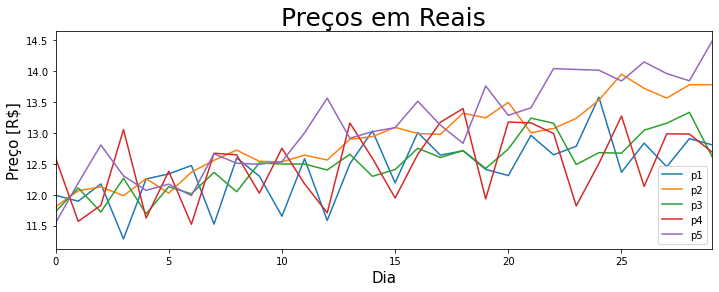

In [2]:
def MBG(po,mu,sigma,t):
    w = np.random.normal(0,1, t)
    t=np.arange(0,t)
    return po*np.exp((mu-(sigma**2)/2)*t+sigma*w)


po    =    [12,   12,   12,   12, 12]
mu    =    [.003, 0.005, 0.0033, 0.0041, 0.006]
sigma =    [0.033,  0.015,  0.02, 0.05, 0.022]
t     =    30

df=None

for i in range(len(po)):
    
    if df is None:
        df=pd.DataFrame(MBG(po[i],mu[i],sigma[i],t))
    else:
        df=pd.concat([df,pd.DataFrame(MBG(po[i],mu[i],sigma[i],t))],axis=1)

df.columns=list(['p'+str(x) for x in range(1,len(po)+1)])

fig = plt.subplots(figsize=(40,4))

ax1=plt.subplot(1,3, 1) 
df[df.columns[:5]].plot(ax=ax1)
ax1.set_title('Preços em Reais',fontsize=25)
ax1.set_ylabel('Preço [R$]',fontsize=15)
ax1.set_xlabel('Dia',fontsize=15)
ax1.legend(loc='upper left',fontsize=15)   
plt.legend(loc='lower right')


<div id="Representação Matricial">
    <h2>2) Matrizes de Covariância e Correlação dos Retornos</h2>
</div>

  <p> Considerando o escopo que envolve multiplos ativos, o processo operacional passa a ser matricial. Assim, a expectativa de retorno, $\boldsymbol{\mu}$, é um vetor de tamanho <b> Nx1</b> é definido como
 </p>&emsp;



 


 <li>$\textbf{r}(n)  = [r_1(n) \ r_2(n)  \ ... \ r_N(n) ]^T$  </li> &emsp;
  <li>$\boldsymbol{\mu}  = [\mu_1 \ \mu_2  \ ... \ \mu_N ]^T$</li> &emsp; 
  <p> E as matrizes  de   covariâcia  ($\textbf{C}$)  e   correlação  ($\textbf{P}$)  para  ativos  do  portfolio são </p>
   &emsp;
  <li>$\textbf{C} = [C_ {ij}]=E\{r_i(n)r_j(n)\}-\mu_i\mu_j$ </li>
  <p></p>
  <li>$\textbf{P} = [P_ {ij}]=\frac{E\{r_i(n)r_j(n)\}-\mu_i\mu_j}{\sigma_i\sigma_j}$</li>
  <p>Determinando a matriz diagonal de volatilidade de tamanho $NxN$ como</p>  &emsp;
  <li> $\sum=\begin{bmatrix}
    \sigma_1 & . & . & 0  \\
    . & \sigma_2 & . & .  \\
    . & . & . & .  \\
    0 & . & . & \sigma_N 
  \end{bmatrix}  $ </li> &emsp;
  <p>É possível identificar</p>  &emsp;
  <li>$\textbf{C}=E\{\textbf{r}(n)\textbf{r}^T(n)\}-\boldsymbol{\mu}\boldsymbol{\mu}^T=\sum^T\textbf{P}\sum$</li>



Preços [R$]:
          p1         p2         p3         p4         p5
0  11.989133  11.803498  11.724015  12.595709  11.542367
1  11.894227  12.064400  12.109786  11.567412  12.188307
2  12.174680  12.125159  11.718406  11.826666  12.805430
3  11.282641  11.983927  12.265861  13.054867  12.304591
4  12.254553  12.259615  11.689522  11.619953  12.069136

Retornos [%]:
         r1        r2        r3         r4        r5
1 -0.791595  2.210379  3.290430  -8.163870  5.596250
2  2.357891  0.503628 -3.231929   2.241252  5.063239
3 -7.327005 -1.164790  4.671751  10.385009 -3.911143
4  8.614228  2.300481 -4.698725 -10.991412 -1.913552

Matriz de Volatilidade [%]:
        r1        r2       r3        r4        r5
r1  5.3813  0.000000 -0.00000 -0.000000 -0.000000
r2  0.0000  1.674253 -0.00000  0.000000 -0.000000
r3 -0.0000 -0.000000  2.84662  0.000000 -0.000000
r4 -0.0000  0.000000  0.00000  6.947261 -0.000000
r5 -0.0000 -0.000000 -0.00000 -0.000000  3.223592



Text(0.5, 1.0, 'Correlações entre ativos ')

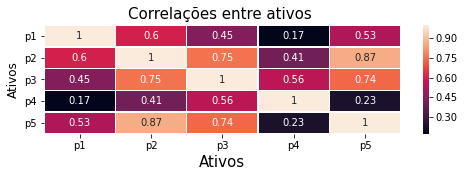

In [3]:
ret=100*df.pct_change().dropna()

ret.columns=list(['r'+str(x) for x in range(1,len(po)+1)])

C=ret.cov()

sig=ret.std()

MU=ret.sum()

I=pd.DataFrame(np.identity(len(C)))

SIGMA=(C*(I.values))**0.5

P=df.corr()
print()
print("Preços [R$]:")
print(df.head())
print('')
print("Retornos [%]:")
print(ret.head(4))
print('')
print("Matriz de Volatilidade [%]:")
print(SIGMA)
print()
f, ax = plt.subplots(figsize=(8, 2))
sns.heatmap(P, annot=True, linewidths=.5, ax=ax)
plt.yticks(rotation=0) 
ax.set_ylabel("Ativos",fontsize=12)  
ax.set_xlabel("Ativos",fontsize=15)  
ax.set_title("Correlações entre ativos ",fontsize=15) 

<div id="Portfolio 2">
    <h2>3) Portfolio com dois Ativos</h2>
</div>

  <p> O <b>retorno </b>de um portfolio é a média ponderada dos retornos de seus ativos. Sendo o portfolio com 2 (dois) ativos </p>&emsp;
  <li>$r_p(n)=q_1(n)r_1(n)+q_2(n)r_2(n)$  </li> &emsp;
   <p>A <b>expectativa de retorno</b> de um portfolio com dois ativos, com $q_1+q_2=1$, é calculado por </p> &emsp;
  <li>$\mu_p = E\{r_p \}= q_1 E \{r_1 \} + q_2 E \{r_2 \}$ </li>
  <p></p>
  <p>O desvio padrão ou o <b>risco</b> do portfolio é dado por</p>  &emsp;
  <li> $\sigma_p=(E\{r_p r_p\}-E\{r_p \}E\{r_p \})^{1/2}=(q^2_1\sigma^2_1+2
  q_1q_2\sigma_1\sigma_2\rho_{12} +q^2_2\sigma^2_2 )^{1/2} $  </li> &emsp;
 
 &emsp;


In [4]:

q=[ 0.4, 0.6]

print()
print('Os pesos dos ativos r1 e r2 são %.2f e %.2f, respectivamente ' % (q[0],q[1]))
print()

r1,r2=ret['r1'],ret['r2']

print('O retorno e risco de r1 : %.2f e %.2f' % (np.mean(r1),np.std(r1)))
print()
print('O retorno e risco de r2 : %.2f e %.2f' % (np.mean(r2),np.std(r2)))
print()

rp=q[0]*r1+q[1]*r2

print('O retorno e risco de rp em : %.2f e %.2f' % (np.mean(rp),np.std(rp)))
print()

mup=q[0]*np.mean(r1)+q[1]*np.mean(r2)
sigp=(np.mean(np.multiply(rp,rp))-np.multiply(np.mean(rp),np.mean(rp)))**0.5

print('Alternativamente, o retorno e risco de rp : %.2f e %.2f' % (mup,sigp))
print()



Os pesos dos ativos r1 e r2 são 0.40 e 0.60, respectivamente 

O retorno e risco de r1 : 0.37 e 5.29

O retorno e risco de r2 : 0.55 e 1.65

O retorno e risco de rp em : 0.48 e 2.41

Alternativamente, o retorno e risco de rp : 0.48 e 2.41



<div id="Portfolio N">
    <h2>4) Portfolio com N Ativos</h2>
</div>

  <p> Ampliando o conceito para <b>N-ativos
do portfolio</b>. O retorno para N-ativos de um portfolio é expresso como </p>&emsp;
  <li>$r_p=\textbf{q}^T\textbf{r}=\sum_{i=1}^{n}q_ir_i$  </li> &emsp;
   <p>Onde $q$ e um vetor $Nx1$ relacionado à alocação de capital e definido por</p>
   &emsp;
  <li>$\boldsymbol{q}  = [q_1 \ q_2  \ ... \ q_N ]^T$ </li>
  <p></p>
  <p>Assim, a <b>expectativa de retorno</b> do portfolio é calculado por</p>  &emsp;
  <li> $\mu_p = E\{r_p\} = \boldsymbol{q}^T E\{\textbf{r}\} = \boldsymbol{q}^T  \boldsymbol{\mu} $  </li> &emsp;
   <p>E o seu <b>risco</b> como</p>  &emsp;
  <li> $\sigma_p = (E\{r_p^2 \}-\mu_p^2)^{1/2}= (\boldsymbol{q}^T  \textbf{C} \boldsymbol{q})^{1/2}$  </li> &emsp;


In [5]:
q=np.array([0.4, 0.6])
print()
print('Os pesos dos ativos r1 e r1 são %.2f e %.2f, respectivamente ' % (q[0],q[1]))
print()

r=ret[['r1','r2']]

C=r.cov()
MU=r.mean()

retp=np.dot(pd.DataFrame(q).transpose(),MU)

risp=np.sqrt(np.dot(np.dot(pd.DataFrame(q).transpose(),C),np.array(q)))

print('O retorno e risco de rp em : %.2f e %.2f' % (retp,risp))
print()


Os pesos dos ativos r1 e r1 são 0.40 e 0.60, respectivamente 

O retorno e risco de rp em : 0.48 e 2.45



In [6]:
N=len(ret.columns)
q = [random.randint(0,1000) for i in range(1,N+1)]
s = sum(q)
q = [ i/s for i in q ]
rp=np.dot(ret,q)
C=ret.cov()
MU=ret.mean()
retp=np.dot(pd.DataFrame(q).transpose(),MU)
risp=np.sqrt(np.dot(np.dot(pd.DataFrame(q).transpose(),C),pd.DataFrame(q)))


print()
print('Os pesos dos ativos são:',[round(q[i],2) for i in range(len(q))])
print()
print('O retorno e risco de rp em : %.2f e %.2f' % (retp[0], risp[0][0]))
print()


Os pesos dos ativos são: [0.34, 0.18, 0.1, 0.22, 0.16]

O retorno e risco de rp em : 0.44 e 2.10



In [7]:
def Portfolios(ret,ports):
    retp=[]
    risp=[]
    C=ret.cov()
    MU=ret.mean()
    SIG=ret.std()
    N=len(ret.columns)
    for i in tqdm(range(ports)):
        q = [random.randint(0,10000) for i in range(1,N+1)]
        s = sum(q)
        q = [ i/s for i in q ]

        retp.append(np.dot(pd.DataFrame(q).transpose(),MU)[0])
        risp.append(np.sqrt(np.dot(np.dot(pd.DataFrame(q).transpose(),C),pd.DataFrame(q)))[0][0])
    return retp, risp, SIG, MU
    
retp, risp, SIG, MU=Portfolios(ret,1000) 

100%|██████████| 1000/1000 [00:01<00:00, 673.98it/s]


Text(0.5, 1.0, '1000 Portifolios')

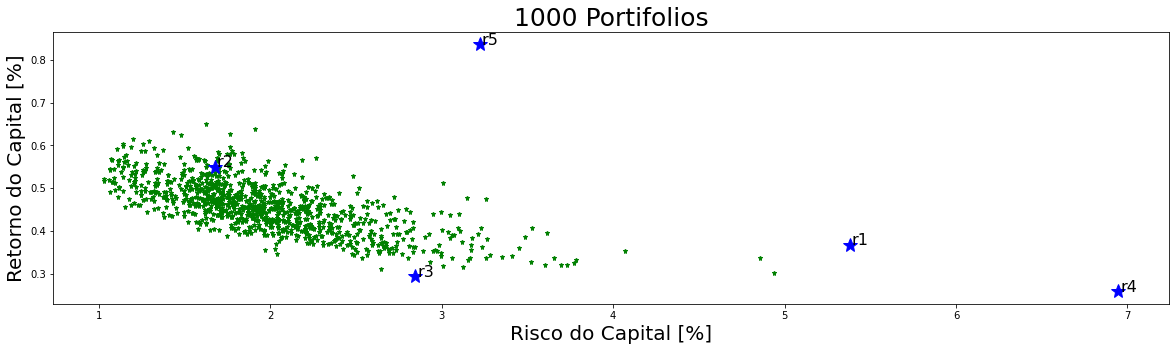

In [8]:
fig = plt.subplots(figsize=(20,5))

ax1=plt.subplot(1,1, 1)     
for p in range(0,len(retp)):
    ax1.plot(risp[p], retp[p], 'g*', markersize=5.0)  
#    ax1.text(100*(sig[p]+0.001), 100*MU[p],df.columns[p], fontsize=8)

for p in range(0,len(SIG)):
    ax1.plot(SIG[p], MU[p], 'b*', markersize=15.0) 
    ax1.text(SIG[p]+0.01, MU[p],'r'+str(p+1) , fontsize=16)

ax1.set_ylabel("Retorno do Capital [%]",fontsize=20)
ax1.set_xlabel("Risco do Capital [%]",fontsize=20)
ax1.set_title(str(len(retp))+" Portifolios",fontsize=25)  

<div id="Portfolio Fronteira">
    <h2>5) Markowitz - Fronteira da Eficiência</h2>
</div>



<p>Na teoria moderna do portfolio, a <b>otimização do portfolio</b> é obtida minimizando o risco do portfolio, $\sigma_p$, com a restrição de que o retorno esperado do portfolio, $\mu_p$, seja igual a uma constante, $\mu$ , ou seja, 
</p> 



  <li>$\mu_p = \boldsymbol{q}^T  \boldsymbol{\mu} =\sum_{i=1}^{N}q_i\mu_i=\mu$  </li> &emsp;
  
  <p> Uma restrição adicional, é o capital de investimento constante do portfolio, ou seja, </p>
   &emsp;
  <li>$\boldsymbol{q}^T  \boldsymbol{1} =\sum_{i=1}^{N}q_i=1$ </li>
 
  <p>O problema de minimização do risco para criar um portfolio eficiente, sujeito às restrições indicadas, pode ser resolvido com a introdução de dois multiplicadores Lagrangianos. Nós escrevemos o Lagrangiano para este problema como</p>  &emsp;
  <li>$L(\boldsymbol{q},\lambda_{1},\lambda_{2})=\frac{1}{2}\boldsymbol{q}^{T}\boldsymbol{C}\boldsymbol{q}+\lambda_{1}(\mu-\boldsymbol{q}^{T}\boldsymbol{\mu})+\lambda_{2}(1-\boldsymbol{q}^{T}\boldsymbol{1})$  </li> &emsp;
  
  
  
  <p>O vetor ótimo de alocação de investimento é calculado definindo as derivadas parciais para zero, como a seguir</p>  &emsp;
 <li>$\frac{\partial L(\boldsymbol{q},\lambda_{1},\lambda_{2})}{\partial \boldsymbol{q}}=0$,
$\frac{\partial L(\boldsymbol{q},\lambda_{1},\lambda_{2})}{\partial \lambda_{1}}=0$,
$\frac{\partial L(\boldsymbol{q},\lambda_{1},\lambda_{2})}{\partial \lambda_{2}}=0$ </li> 

 &emsp;
   <p>Estas equações levam à seguinte solução para o investimento ideal para o vetor de alocação</p>  &emsp;
  <li>$
  \boldsymbol{q}^{*} = \frac{
  \begin{vmatrix} \mu & \boldsymbol{1}^{T}\boldsymbol{C}^{-1}\boldsymbol{\mu}  \\ 1 & \boldsymbol{1}^{T}\boldsymbol{C}^{-1}\boldsymbol{1}   \\  \end{vmatrix}\boldsymbol{C}^{-1}\boldsymbol{\mu} + 
  \begin{vmatrix} \boldsymbol{\mu}^{T}\boldsymbol{C}^{-1}\boldsymbol{\mu} & \mu  \\ \boldsymbol{\mu}^{T}\boldsymbol{C}^{-1}\boldsymbol{1} & 1  \\  \end{vmatrix}\boldsymbol{C}^{-1}\boldsymbol{1}  }
  {
  \begin{vmatrix} \boldsymbol{\mu}^{T}\boldsymbol{C}^{-1}\boldsymbol{\mu}& \boldsymbol{1}^{T}\boldsymbol{C}^{-1}\boldsymbol{\mu}  \\ \boldsymbol{\mu}^{T}\boldsymbol{C}^{-1}\boldsymbol{1} & \boldsymbol{1}^{T}\boldsymbol{C}^{-1}\boldsymbol{1} \\  \end{vmatrix}}
$</li>



In [9]:
def TPM_Fronteira(ret,N):
    C=ret.cov()
    MU=ret.mean()
    ONE=np.ones(len(ret.columns))
    #N=1000
    a=np.dot(pd.DataFrame(MU).transpose(),np.dot(np.linalg.inv(C),pd.DataFrame(MU)))
    b=np.dot(pd.DataFrame(ONE).transpose(),np.dot(np.linalg.inv(C),pd.DataFrame(MU)))
    c=np.dot(pd.DataFrame(MU).transpose(),np.dot(np.linalg.inv(C),pd.DataFrame(ONE)))
    d=np.dot(pd.DataFrame(ONE).transpose(),np.dot(np.linalg.inv(C),pd.DataFrame(ONE)))
    target_mus=np.arange(-0.5,1.0,0.002)
    risk_at_target_mus=np.zeros(len(target_mus))
    for i in tqdm(range(0, len(target_mus))):
        target_mu=target_mus[i]
        v1=np.linalg.det([[target_mu,b[0][0]],[1,d[0][0]]])*np.dot(np.linalg.inv(C),pd.DataFrame(MU))
        v2=np.linalg.det([[a[0][0],target_mu],[c[0][0],1]])*np.dot(np.linalg.inv(C),pd.DataFrame(ONE))
        v3=np.linalg.det([[a[0][0],b[0][0]],[c[0][0],d[0][0]]])
        opt_q=(v1+v2)/v3
        risk_at_target_mus[i]=(np.dot(np.dot(pd.DataFrame(opt_q).transpose(),C),pd.DataFrame(opt_q)))**0.5
    return risk_at_target_mus, target_mus

risk_at_target_mus, target_mus = TPM_Fronteira(ret,1000)

100%|██████████| 750/750 [00:01<00:00, 626.47it/s]


Text(0.5, 0, 'Risco do Capital [%]')

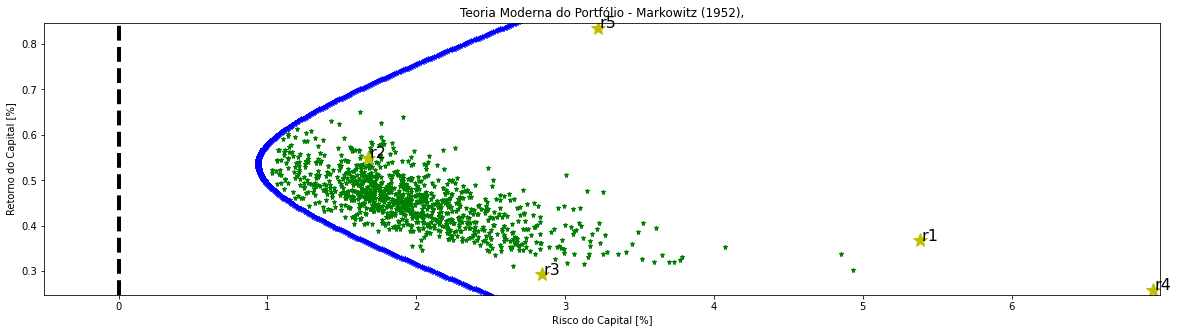

In [10]:
fig = plt.subplots(figsize=(20,5))
for p in range(0,len(retp)):
    plt.plot(risp[p], retp[p], 'g*', markersize=5.0)  
#plt.plot(100*risk_minrisk,100*mu_minrisk,'k*',markersize=15.0)
plt.axis([-0.5,np.max(SIG)+0.05,np.min(MU)-0.01,np.max(MU)+.01])
plt.axvline(x= 0, color= 'k',linestyle='dashed',linewidth=4)
for p in range(0,len(SIG)):
    plt.plot(SIG[p], MU[p], 'y*', markersize=15.0) 
    plt.text(SIG[p]+0.01, MU[p],'r'+str(p+1) , fontsize=16)

plt.plot(risk_at_target_mus,target_mus,'b*')
#plt.axis([-0.5,np.max(100*SIG),0,np.max(100*MU)])
plt.title('Teoria Moderna do Portfólio - Markowitz (1952),')
plt.ylabel('Retorno do Capital [%]')
plt.xlabel('Risco do Capital [%]')

<div id="Portfolio Risco">
    <h2>6) Markowitz - Menor Risco</h2>
</div>




  <p>Existe apenas uma carteira eficiente na condição de <b> menor risco</b>, estabelecida pela otimização do Lagrangiano
 </p>&emsp;
  <li>$L(\boldsymbol{q},\lambda)=\frac{1}{2}\boldsymbol{q}^{T}\boldsymbol{C}\boldsymbol{q}+\lambda(1-\boldsymbol{q}^{T}\boldsymbol{1})$   </li> &emsp;
   <p>ao atender as seguintes derivadas parciais para zero</p>
   &emsp;
  <li>$\frac{\partial L(\boldsymbol{q},\lambda)}{\partial \boldsymbol{q}}=0$,
$\frac{\partial L(\boldsymbol{q},\lambda)}{\partial \lambda}=0$ </li>
  <p></p>
  <p>Essas equações levam à seguinte solução para a alocação de investimentos do vetor da carteira de risco mínimo</p>  &emsp;
  <li>$\boldsymbol{q}_{min} = \frac{\boldsymbol{C}^{-1}\boldsymbol{1}}{\boldsymbol{1}^{T}\boldsymbol{C}^{-1}\boldsymbol{1}}$  </li> &emsp;
   <p>Reforçando, o portfólio de risco mínimo é único.</p>  



In [11]:
def TPM_Menor_Risco(ret):
    C=ret.cov()
    MU=ret.mean()
    ONE=np.ones(len(ret.columns))
    d=np.dot(pd.DataFrame(ONE).transpose(),np.dot(np.linalg.inv(C),pd.DataFrame(ONE)))
    q_minrisk=np.dot(np.linalg.inv(C),pd.DataFrame(ONE))/d
    mu_minrisk=np.dot(q_minrisk.transpose(),MU.values)
    risk_minrisk=(np.dot(np.dot(pd.DataFrame(q_minrisk).transpose(),C),pd.DataFrame(q_minrisk)))**0.5
    return q_minrisk,mu_minrisk,risk_minrisk

q_minrisk,mu_minrisk,risk_minrisk = TPM_Menor_Risco(ret)


Os pesos dos ativos no portifólio de menor risco: [0.06, 0.5, 0.22, 0.02, 0.2]



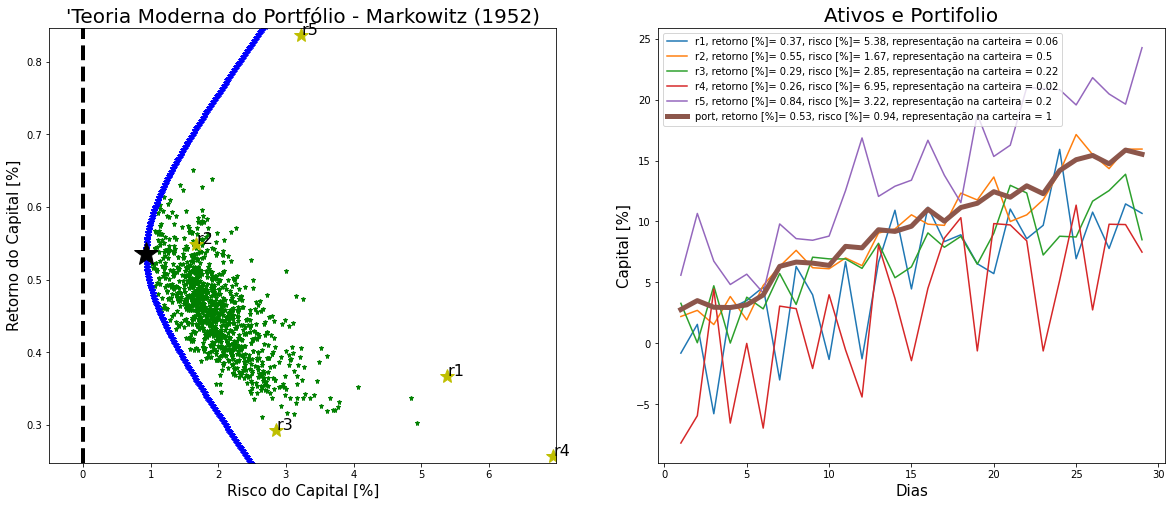

In [12]:
fig = plt.subplots(figsize=(20,8))
ax1=plt.subplot(1,2, 1) 

for p in range(0,len(retp)):
    plt.plot(risp[p], retp[p], 'g*', markersize=5.0)  
#plt.plot(100*risk_minrisk,100*mu_minrisk,'k*',markersize=15.0)

ax1.plot(risk_at_target_mus,target_mus,'b*')
ax1.plot(risk_minrisk,mu_minrisk,'k*',markersize=25)

plt.axis([-0.5,np.max(SIG)+0.05,np.min(MU)-0.01,np.max(MU)+.01])
ax1.axvline(x= 0, color= 'k',linestyle='dashed',linewidth=4)
for p in range(0,len(SIG)):
    plt.plot(SIG[p], MU[p], 'y*', markersize=15.0) 
    plt.text(SIG[p]+0.01, MU[p],'r'+str(p+1) , fontsize=16)

ret['port']=pd.DataFrame(ret*[q_minrisk[i][0] for i in range(len(q_minrisk))]).sum(axis=1)
pesos=[q_minrisk[i][0] for i in range(len(q_minrisk))]+[1]
ax1.set_xlabel("Risco do Capital [%]",fontsize=15)
ax1.set_ylabel('Retorno do Capital [%]',fontsize=15)
ax1.set_title("'Teoria Moderna do Portfólio - Markowitz (1952)",fontsize=20)  

ax2=plt.subplot(1,2, 2) 

for i in range(len(ret.columns)):
    labeldf=ret.columns[i]+", retorno [%]= "+str(round(ret.mean()[i],2)) +", risco [%]= "+str(round(ret.std()[i],2))
    if i!=max(range(len(ret.columns))):
        ax2.plot(ret[ret.columns[i]].cumsum(),label=labeldf+", representação na carteira = "+str(round(pesos[i],2)))  
    if i==max(range(len(ret.columns))):
        ax2.plot(ret[ret.columns[i]].cumsum(),linewidth=5.0,label=labeldf+", representação na carteira = "+str(round(pesos[i],2)))  
ax2.legend(loc='upper left')


ax2.set_xlabel("Dias",fontsize=15)
ax2.set_ylabel('Capital [%]',fontsize=15)
ax2.set_title("Ativos e Portifolio",fontsize=20) 
print()
print('Os pesos dos ativos no portifólio de menor risco:',[round(q_minrisk[i][0],2) for i in range(len(q_minrisk))])
print()


ret=ret.drop(columns=['port'])

<div id="Portfolio Sharpe">
    <h2>7) Markowitz - Maior Sharpe</h2>
</div>



  <p>A carteira que esteja dentro da bala de Markowitz, com a seguinte inclinação, corresponde a de <b>maior Sharpe</b>
  </p>&emsp;
  <li>$\frac{\boldsymbol{q}^{T}\boldsymbol{\mu}-r_f}{(\boldsymbol{q}^{T}\boldsymbol{C}\boldsymbol{q})^{1/2}}$  </li> 
   <p>A carteira <b>Sharpe</b> ou de mercado é aquela que maximiza essa inclinação sujeita à restrição que $\boldsymbol{q}^T  \boldsymbol{1} =1$. Semelhante ao problema de otimização de portfólio discutido anteriormente, definimos o Lagrangeano da seguinte forma </p>
   &emsp;
  <li>$L(\boldsymbol{q},\lambda)=\frac{\boldsymbol{q}^{T}\boldsymbol{\mu}-r_f}{(\boldsymbol{q}^{T}\boldsymbol{C}\boldsymbol{q})^\frac{1}{2}}+\lambda(1-\boldsymbol{q}^{T}\boldsymbol{1})$  </li>&emsp;
    <li>$\frac{\partial L(\boldsymbol{q},\lambda)}{\partial \boldsymbol{q}}=0$,
$\frac{\partial L(\boldsymbol{q},\lambda)}{\partial \lambda}=0$ </li>
  
  <p></p>
  <p>Essas equações nos levam à seguinte solução para o investimento vetor de alocação da carteira de mercado</p>  &emsp;
  <li>$\boldsymbol{q}_{M} = \frac{\boldsymbol{C}^{-1}(\boldsymbol{\mu}-r_f\boldsymbol{1})}
			     {\boldsymbol{1}^{T}\boldsymbol{C}^{-1}(\boldsymbol{\mu}-r_f\boldsymbol{1})}$  </li> 
   <p>Portanto, o retorno do carteira de mercado pode ser calculada como retorno esperado, $\mu_M$, e risco, $\sigma_M$, e seu risco são dados como </p>  &emsp;
<li>$r_M=\boldsymbol{q}_{M}^T\boldsymbol{r}$</li>

<li>$\mu_M=\boldsymbol{q}_{M}^T\boldsymbol{\mu}$</li> 

<li>$\sigma_M=\boldsymbol{q}_{M}^T\boldsymbol{C}\boldsymbol{q}_{M}$ </li>


In [13]:
def TPM_Maior_Sharpe(ret,N):
    C=ret.cov()
    MU=ret.mean()
    ONE=np.ones(len(ret.columns))
    rf=0.2
    temp=np.dot(np.linalg.inv(C),pd.DataFrame(MU-np.dot(ONE,rf)))
    qm=temp/temp.sum()
    mu_m=np.dot(qm.transpose(),MU)
    sigma_m=(np.dot(np.dot(pd.DataFrame(qm).transpose(),C),pd.DataFrame(qm)))**0.5
    return qm,mu_m,sigma_m

qm,mu_m,sigma_m = TPM_Maior_Sharpe(ret,1000)


Os pesos dos ativos no portifólio de menor risco: [0.04, 0.51, 0.14, 0.03, 0.28]



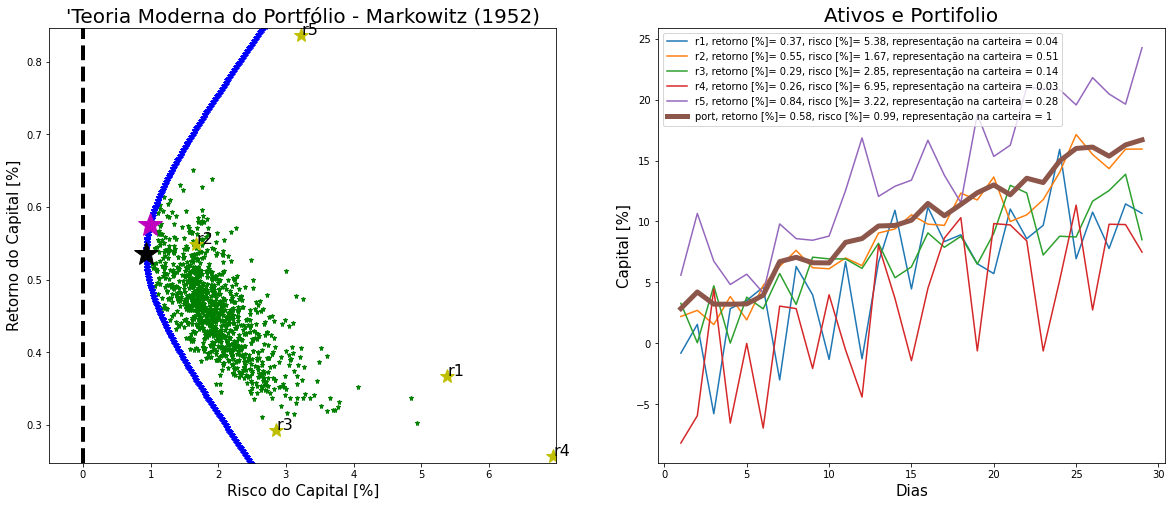

In [14]:
fig = plt.subplots(figsize=(20,8))
ax1=plt.subplot(1,2, 1) 
for p in range(0,len(retp)):
    plt.plot(risp[p], retp[p], 'g*', markersize=5.0)  
#plt.plot(100*risk_minrisk,100*mu_minrisk,'k*',markersize=15.0)

ax1.plot(risk_at_target_mus,target_mus,'b*')
ax1.plot(risk_minrisk,mu_minrisk,'k*',markersize=25)

ax1.plot(sigma_m,mu_m,'m*',markersize=25)


plt.axis([-0.5,np.max(SIG)+0.05,np.min(MU)-0.01,np.max(MU)+.01])
ax1.axvline(x= 0, color= 'k',linestyle='dashed',linewidth=4)
for p in range(0,len(SIG)):
    plt.plot(SIG[p], MU[p], 'y*', markersize=15.0) 
    plt.text(SIG[p]+0.01, MU[p],'r'+str(p+1) , fontsize=16)

ret['port']=pd.DataFrame(ret*[qm[i][0] for i in range(len(qm))]).sum(axis=1)
pesos=[qm[i][0] for i in range(len(qm))]+[1]
ax1.set_xlabel("Risco do Capital [%]",fontsize=15)
ax1.set_ylabel('Retorno do Capital [%]',fontsize=15)
ax1.set_title("'Teoria Moderna do Portfólio - Markowitz (1952)",fontsize=20)  

ax2=plt.subplot(1,2, 2) 

for i in range(len(ret.columns)):
    labeldf=ret.columns[i]+", retorno [%]= "+str(round(ret.mean()[i],2)) +", risco [%]= "+str(round(ret.std()[i],2))
    if i!=max(range(len(ret.columns))):
        ax2.plot(ret[ret.columns[i]].cumsum(),label=labeldf+", representação na carteira = "+str(round(pesos[i],2)))     
    if i==max(range(len(ret.columns))):
        ax2.plot(ret[ret.columns[i]].cumsum(),linewidth=5.0,label=labeldf+", representação na carteira = "+str(round(pesos[i],2)))  

ax2.legend(loc='upper left')
ax2.set_xlabel("Dias",fontsize=15)
ax2.set_ylabel('Capital [%]',fontsize=15)
ax2.set_title("Ativos e Portifolio",fontsize=20) 
print()
print('Os pesos dos ativos no portifólio de menor risco:',[round(qm[i][0],2) for i in range(len(qm))])
print()


ret=ret.drop(columns=['port'])

<div id="Portfolio Curva">
    <h2>8) Linha de Mercado de Capitais</h2>
</div>




  <p>Vamos calcular o retorno de uma carteira, $r_{\hat{p}}$, na qual investimos em uma carteira livre de risco com retorno $r_f$ (uma constante) e uma carteira de ativos de risco, $r_p$,
 </p>&emsp;
  <li>$r_{\hat{p}} = q_f r_f + q_p r_p, \ \ com \ \ q_f + q_p =1$   </li> &emsp;
   <p>O retorno esperado e a variância do portfolio ${r_\hat{p}}$ é expressa como  </p> &emsp;
  <li>$E \{r_{\hat{p}}\} = r_\hat{p} = E \{q_f r_f + q_p r_p\} = q_f r_f + q_p \hat{p}_p$ </li>
    <li>$var(r_{\hat{p}}) = var(q_f r_f + q_p r_p)=q_p^2var(r_p) \Rightarrow \sigma_{\hat{p}}=q_p\sigma_p $ </li>
  <p></p>
  <p>Assim</p>  
  
  <li>$\mu_{\hat{p}} = r_f+\sigma_{\hat{p}} \frac{\mu_{\hat{p}}-r_f}{\sigma_p}$  </li> &emsp;
  
  <p>O excesso de retorno sobre a carteira sem risco é denominado de <b>prêmio de risco</b> e a equação supracitada corresponde a <b>Linha de Mercado de Capitais</b>.
</p>  &emsp;




Os pesos dos ativos no portifólio de menor risco: [0.04, 0.51, 0.14, 0.03, 0.28]



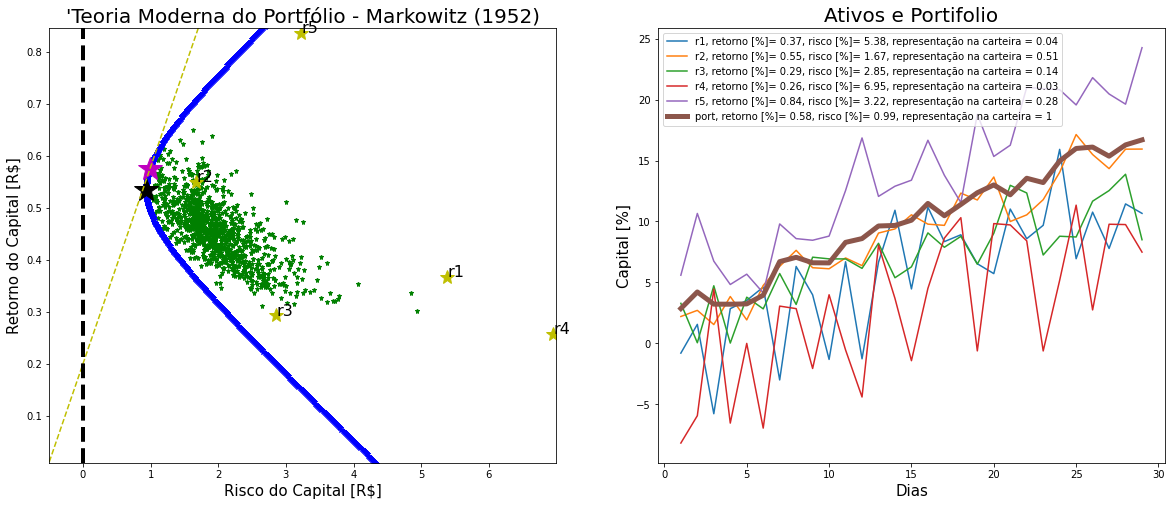

In [15]:
rf=0.2
sigma_m=(np.dot(np.dot(pd.DataFrame(qm).transpose(),C),pd.DataFrame(qm)))**0.5
cm_line=sigma_m[0][0]*(target_mus-rf)/(mu_m-rf)
arbitrary_line=sig[1]*(target_mus-rf)/(MU[1]-rf)


fig = plt.subplots(figsize=(20,8))
ax1=plt.subplot(1,2, 1) 
for p in range(0,len(retp)):
    plt.plot(risp[p], retp[p], 'g*', markersize=5.0)  
#plt.plot(100*risk_minrisk,100*mu_minrisk,'k*',markersize=15.0)


ax1.plot(risk_at_target_mus,target_mus,'b*')
ax1.plot(risk_minrisk,mu_minrisk,'k*',markersize=25)

ax1.plot(sigma_m,mu_m,'m*',markersize=25)
ax1.plot(cm_line,target_mus,'y--')

plt.axis([-0.5,np.max(SIG)+0.05,0.01,np.max(MU)+.01])
ax1.axvline(x= 0, color= 'k',linestyle='dashed',linewidth=4)
for p in range(0,len(SIG)):
    plt.plot(SIG[p], MU[p], 'y*', markersize=15.0) 
    plt.text(SIG[p]+0.01, MU[p],'r'+str(p+1) , fontsize=16)

if 'port' in ret.columns: 
    ret=ret.drop(columns=['port'])


ret['port']=pd.DataFrame(ret*[qm[i][0] for i in range(len(qm))]).sum(axis=1)
pesos=[qm[i][0] for i in range(len(qm))]+[1]
ax1.set_xlabel("Risco do Capital [%]",fontsize=15)
ax1.set_ylabel('Retorno do Capital [%]',fontsize=15)
ax1.set_title("'Teoria Moderna do Portfólio - Markowitz (1952)",fontsize=20)  

ax2=plt.subplot(1,2, 2) 

for i in range(len(ret.columns)):
    labeldf=ret.columns[i]+", retorno [%]= "+str(round(ret.mean()[i],2)) +", risco [%]= "+str(round(ret.std()[i],2))
    if i!=max(range(len(ret.columns))):
        ax2.plot(ret[ret.columns[i]].cumsum(),label=labeldf+", representação na carteira = "+str(round(pesos[i],2)))     
    if i==max(range(len(ret.columns))):
        ax2.plot(ret[ret.columns[i]].cumsum(),linewidth=5.0,label=labeldf+", representação na carteira = "+str(round(pesos[i],2)))  
    
    
ax2.legend(loc='upper left')
ax2.set_xlabel("Dias",fontsize=15)
ax2.set_ylabel('Capital [%]',fontsize=15)
ax2.set_title("Ativos e Portifolio",fontsize=20) 
print()
print('Os pesos dos ativos no portifólio de menor risco:',[round(qm[i][0],2) for i in range(len(qm))])
print()

ret=ret.drop(columns=['port'])

<b>Fim da Atividade!!!</b> 
